# **Projet de modélisation géométrique** 

### **Nom :** Lyamoudi, Chen
### **Prénom :** Kawtar, Bryan
----

Au sein de ce projet, nous allons implémenter le modèle de représentation de **surfaces à patches triangulaires**, suivant le schéma **Butterfly**.

----

Pour ce faire, on va essayer de tester notre modèle sur différents grillages (dans notre projet, ce sera appelé des "figures") qu'on décidera afin de mettre en valeur cette subdivision.

---

## **FIGURE 1 : Le losange**

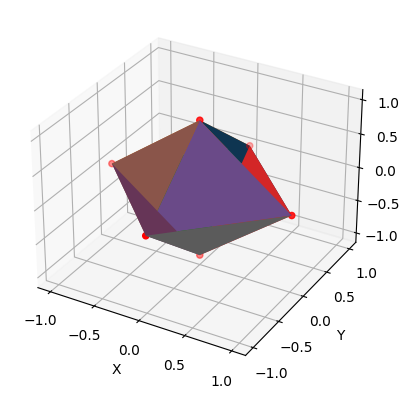

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Coordonnées des points
points = np.array([
    [0.0, 1.0, 0.0],
    [1.0, 0.0, 0.0],
    [0.0, 0.0, 1.0],
    [-1.0, 0.0, 0.0],
    [0.0, 0.0, -1.0],
    [0.0, -1.0, 0.0]
])

# Liste des indices des points formant chaque triangle
triangles = np.array([
    [0, 1, 2],
    [0, 2, 3],
    [0, 3, 4],
    [0, 4, 1],
    [5, 1, 2],
    [5, 2, 3],
    [5, 3, 4],
    [5, 4, 1]
])

# Création de la figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Tracé des points
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c='r', marker='o')

# Tracé des surfaces triangulaires
for triangle in triangles:
    ax.plot_trisurf(points[triangle, 0], points[triangle, 1], points[triangle, 2], linewidth=0.2, antialiased=True)

# Configuration de l'axe des coordonnées
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Affichage de la figure
plt.show()


## **FIGURE 1 : Le cube**

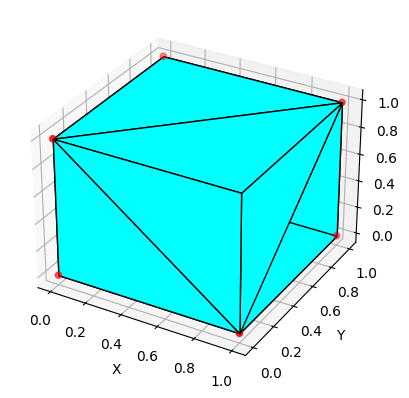

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Définition des points du cube
points = np.array([
    [0.0, 0.0, 0.0],
    [0.0, 1.0, 0.0],
    [0.0, 1.0, 1.0],
    [0.0, 0.0, 1.0],
    [1.0, 0.0, 0.0],
    [1.0, 1.0, 0.0],
    [1.0, 1.0, 1.0],
    [1.0, 0.0, 1.0]
])

# Définition des triangles du cube
triangles = np.array([
    [0, 1, 2], [0, 2, 3],  # Face avant
    [4, 5, 6], [4, 6, 7],  # Face arrière
    [0, 1, 4], [1, 4, 5],  # Côté gauche
    [2, 3, 6], [3, 6, 7],  # Côté droit
    [0, 3, 4], [3, 4, 7],  # Dessous
    [1, 2, 5], [2, 5, 6]   # Dessus
])

# Plot des points et des triangles
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot des points
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c='r', marker='o')

# Plot des triangles
for tri in triangles:
    poly = Poly3DCollection([points[tri]])
    poly.set_edgecolor('k')
    poly.set_facecolor('cyan')
    ax.add_collection3d(poly)

# Configuration des axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Affichage du plot
plt.show()


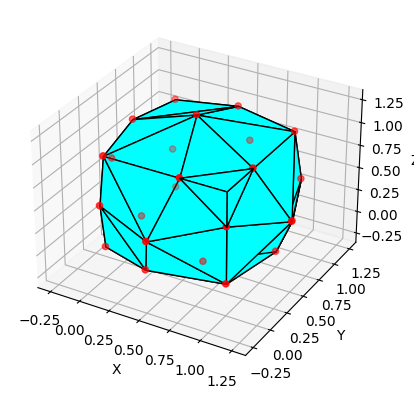

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Définition des points du cube
points = np.array([
    [0.0, 0.0, 0.0],
    [0.0, 1.0, 0.0],
    [0.0, 1.0, 1.0],
    [0.0, 0.0, 1.0],
    [1.0, 0.0, 0.0],
    [1.0, 1.0, 0.0],
    [1.0, 1.0, 1.0],
    [1.0, 0.0, 1.0]
])

point_x =[0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0]
point_y =[0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0]
point_z =[0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0]
# Définition des triangles du cube
triangles = np.array([
    [0, 1, 2], [0, 2, 3],  # Face avant
    [4, 5, 6], [4, 6, 7],  # Face arrière
    [0, 1, 4], [1, 4, 5],  # Côté gauche
    [2, 3, 6], [3, 6, 7],  # Côté droit
    [0, 3, 4], [3, 4, 7],  # Dessous
    [1, 2, 5], [2, 5, 6]   # Dessus
])


# Création de la nouvelle subdivision
new_triangles = np.array([])

w = 1/16

# Fonction qui récupère les triangles adjacents à deux points
def get_adjacent_triangles(triangles,pointA, pointB):
    liste_1_2 = [pointA,pointB]
    liste_1_8 = []
    liste_m_1_16 = []
    for tri in triangles:
        if pointA in tri and pointB in tri:
            for point in tri:
                if point != pointA and point != pointB:
                    liste_1_8.append(point)
    for tri in triangles:
        if not (pointA in tri and pointB in tri):
            for point in liste_1_8:
                if (point in tri and pointA in tri):
                    for pointtri in tri:
                        if pointtri != point and pointtri != pointA:
                            liste_m_1_16.append(pointtri)
                elif (point in tri and pointB in tri): 
                    for pointtri in tri:
                        if pointtri != point and pointtri != pointB:
                            liste_m_1_16.append(pointtri)
    
    return liste_1_2,liste_1_8,liste_m_1_16

# Fonction qui calcule le nouveau point sur une arrete de triangle
def create_point_from_edge(triangles,pointA,pointB):
    liste_1_2,liste_1_8,liste_m_1_16 = get_adjacent_triangles(triangles,pointA,pointB)
    # print(len(liste_1_2),len(liste_1_8),len(liste_m_1_16))
 
    xp = 1/2 * sum(np.take(point_x,liste_1_2)) + 2 * w * sum(np.take(point_x,liste_1_8)) - w * sum(np.take(point_x,liste_m_1_16))
    yp = 1/2 * sum(np.take(point_y,liste_1_2)) + 2 * w * sum(np.take(point_y,liste_1_8)) - w * sum(np.take(point_y,liste_m_1_16))
    zp = 1/2 * sum(np.take(point_z,liste_1_2)) + 2 * w * sum(np.take(point_z,liste_1_8)) - w * sum(np.take(point_z,liste_m_1_16))

    return xp,yp,zp


# Création des nouveaux triangles (subdivisés)
def butterfly_subdivision(triangles):
    new_triangles = []
    for tri in triangles:
        triangle1 = []
        triangle2 = []
        triangle3 = []
        triangle4 = []
        p1, p2, p3 = tri
        xp4,yp4,zp4 = create_point_from_edge(triangles,p1,p2)

        condition = np.multiply(np.multiply((xp4 == point_x),(yp4 == point_y)), (zp4 == point_z))
        p4 = np.where(condition)
        if (len(p4[0]) > 0):
            p4 = p4[0][0]
        else:
            #Ajout de point à la liste des coordonées
            point_x.append(xp4)
            point_y.append(yp4)
            point_z.append(zp4)

            p4= len(point_x)-1

        # Création des nouveaux triangles
        triangle1=[p1,p4]
        triangle2=[p2,p4]

        xp5,yp5,zp5 = create_point_from_edge(triangles,p2,p3)

        condition = np.multiply(np.multiply((xp5 == point_x),(yp5 == point_y)), (zp5 == point_z))
        p5 = np.where(condition)
        if (len(p5[0]) > 0):
            p5 = p5[0][0]
        else:
            #Ajout de point à la liste des coordonées
            point_x.append(xp5)
            point_y.append(yp5)
            point_z.append(zp5)
            p5 = len(point_x)-1

        triangle2.append(p5)
        triangle3=[p3,p5]

        xp6,yp6,zp6 = create_point_from_edge(triangles,p3,p1)

        condition = np.multiply(np.multiply((xp6 == point_x),(yp6 == point_y)), (zp6 == point_z))
        p6 = np.where(condition)
        if (len(p6[0]) > 0):
            p6 = p6[0][0]
        else:
            #Ajout de point à la liste des coordonées
            point_x.append(xp6)
            point_y.append(yp6)
            point_z.append(zp6)
            p6 = len(point_x)-1

        triangle1.append(p6)
        triangle3.append(p6)

        triangle4 =[p4,p5,p6]
        
        #Ajout des nouveaux triangles à la liste des triangles
        new_triangles.append(triangle1)
        new_triangles.append(triangle2)
        new_triangles.append(triangle3)
        new_triangles.append(triangle4)

    return new_triangles

# Fonction qui fait la subdivision Butterfly autant de fois que l'on veut
def butterfly_subdivision_loop(triangles,nb_subdivision):
    for i in range(nb_subdivision):
        triangles = butterfly_subdivision(triangles)
    return triangles        



# Plot des points et des triangles
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#On récupere les triangles subdivisés
new_triangles = butterfly_subdivision_loop(triangles,1)

# Plot des points
ax.scatter(point_x, point_y, point_z, c='r', marker='o')

# Plot des triangles
for tri in new_triangles:
    triplet = np.array([point_x[tri[0]],point_y[tri[0]],point_z[tri[0]]])
    triplet = np.vstack((triplet,[point_x[tri[1]],point_y[tri[1]],point_z[tri[1]]]))    
    triplet = np.vstack((triplet,[point_x[tri[2]],point_y[tri[2]],point_z[tri[2]]]))    

    poly = Poly3DCollection([triplet])
    poly.set_edgecolor('k')
    poly.set_facecolor('cyan')
    ax.add_collection3d(poly)

# Configuration des axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Affichage du plot
plt.show()


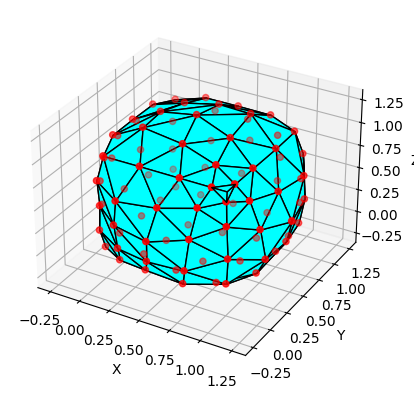

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Définition des points du cube
points = np.array([
    [0.0, 0.0, 0.0],
    [0.0, 1.0, 0.0],
    [0.0, 1.0, 1.0],
    [0.0, 0.0, 1.0],
    [1.0, 0.0, 0.0],
    [1.0, 1.0, 0.0],
    [1.0, 1.0, 1.0],
    [1.0, 0.0, 1.0]
])

point_x =[0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0]
point_y =[0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0]
point_z =[0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0]
# Définition des triangles du cube
triangles = np.array([
    [0, 1, 2], [0, 2, 3],  # Face avant
    [4, 5, 6], [4, 6, 7],  # Face arrière
    [0, 1, 4], [1, 4, 5],  # Côté gauche
    [2, 3, 6], [3, 6, 7],  # Côté droit
    [0, 3, 4], [3, 4, 7],  # Dessous
    [1, 2, 5], [2, 5, 6]   # Dessus
])


# Création de la nouvelle subdivision
new_triangles = np.array([])

w = 1/16

# Fonction qui récupère les triangles adjacents à deux points
def get_adjacent_triangles(triangles,pointA, pointB):
    liste_1_2 = [pointA,pointB]
    liste_1_8 = []
    liste_m_1_16 = []
    for tri in triangles:
        if pointA in tri and pointB in tri:
            for point in tri:
                if point != pointA and point != pointB:
                    liste_1_8.append(point)
    for tri in triangles:
        if not (pointA in tri and pointB in tri):
            for point in liste_1_8:
                if (point in tri and pointA in tri):
                    for pointtri in tri:
                        if pointtri != point and pointtri != pointA:
                            liste_m_1_16.append(pointtri)
                elif (point in tri and pointB in tri): 
                    for pointtri in tri:
                        if pointtri != point and pointtri != pointB:
                            liste_m_1_16.append(pointtri)
    
    return liste_1_2,liste_1_8,liste_m_1_16

# Fonction qui calcule le nouveau point sur une arrete de triangle
def create_point_from_edge(triangles,pointA,pointB):
    liste_1_2,liste_1_8,liste_m_1_16 = get_adjacent_triangles(triangles,pointA,pointB)
    # print(len(liste_1_2),len(liste_1_8),len(liste_m_1_16))
 
    xp = 1/2 * sum(np.take(point_x,liste_1_2)) + 2 * w * sum(np.take(point_x,liste_1_8)) - w * sum(np.take(point_x,liste_m_1_16))
    yp = 1/2 * sum(np.take(point_y,liste_1_2)) + 2 * w * sum(np.take(point_y,liste_1_8)) - w * sum(np.take(point_y,liste_m_1_16))
    zp = 1/2 * sum(np.take(point_z,liste_1_2)) + 2 * w * sum(np.take(point_z,liste_1_8)) - w * sum(np.take(point_z,liste_m_1_16))

    return xp,yp,zp


# Création des nouveaux triangles (subdivisés)
def butterfly_subdivision(triangles):
    new_triangles = []
    for tri in triangles:
        triangle1 = []
        triangle2 = []
        triangle3 = []
        triangle4 = []
        p1, p2, p3 = tri
        xp4,yp4,zp4 = create_point_from_edge(triangles,p1,p2)

        condition = np.multiply(np.multiply((xp4 == point_x),(yp4 == point_y)), (zp4 == point_z))
        p4 = np.where(condition)
        if (len(p4[0]) > 0):
            p4 = p4[0][0]
        else:
            #Ajout de point à la liste des coordonées
            point_x.append(xp4)
            point_y.append(yp4)
            point_z.append(zp4)

            p4= len(point_x)-1

        # Création des nouveaux triangles
        triangle1=[p1,p4]
        triangle2=[p2,p4]

        xp5,yp5,zp5 = create_point_from_edge(triangles,p2,p3)

        condition = np.multiply(np.multiply((xp5 == point_x),(yp5 == point_y)), (zp5 == point_z))
        p5 = np.where(condition)
        if (len(p5[0]) > 0):
            p5 = p5[0][0]
        else:
            #Ajout de point à la liste des coordonées
            point_x.append(xp5)
            point_y.append(yp5)
            point_z.append(zp5)
            p5 = len(point_x)-1

        triangle2.append(p5)
        triangle3=[p3,p5]

        xp6,yp6,zp6 = create_point_from_edge(triangles,p3,p1)

        condition = np.multiply(np.multiply((xp6 == point_x),(yp6 == point_y)), (zp6 == point_z))
        p6 = np.where(condition)
        if (len(p6[0]) > 0):
            p6 = p6[0][0]
        else:
            #Ajout de point à la liste des coordonées
            point_x.append(xp6)
            point_y.append(yp6)
            point_z.append(zp6)
            p6 = len(point_x)-1

        triangle1.append(p6)
        triangle3.append(p6)

        triangle4 =[p4,p5,p6]
        
        #Ajout des nouveaux triangles à la liste des triangles
        new_triangles.append(triangle1)
        new_triangles.append(triangle2)
        new_triangles.append(triangle3)
        new_triangles.append(triangle4)

    return new_triangles

# Fonction qui fait la subdivision Butterfly autant de fois que l'on veut
def butterfly_subdivision_loop(triangles,nb_subdivision):
    for i in range(nb_subdivision):
        triangles = butterfly_subdivision(triangles)
    return triangles        



# Plot des points et des triangles
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#On récupere les triangles subdivisés
new_triangles = butterfly_subdivision_loop(triangles,2)

# Plot des points
ax.scatter(point_x, point_y, point_z, c='r', marker='o')

# Plot des triangles
for tri in new_triangles:
    triplet = np.array([point_x[tri[0]],point_y[tri[0]],point_z[tri[0]]])
    triplet = np.vstack((triplet,[point_x[tri[1]],point_y[tri[1]],point_z[tri[1]]]))    
    triplet = np.vstack((triplet,[point_x[tri[2]],point_y[tri[2]],point_z[tri[2]]]))    

    poly = Poly3DCollection([triplet])
    poly.set_edgecolor('k')
    poly.set_facecolor('cyan')
    ax.add_collection3d(poly)

# Configuration des axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Affichage du plot
plt.show()


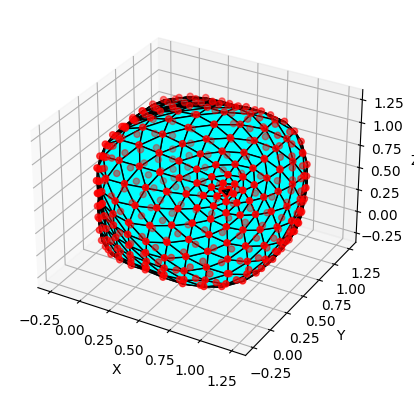

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Définition des points du cube
points = np.array([
    [0.0, 0.0, 0.0],
    [0.0, 1.0, 0.0],
    [0.0, 1.0, 1.0],
    [0.0, 0.0, 1.0],
    [1.0, 0.0, 0.0],
    [1.0, 1.0, 0.0],
    [1.0, 1.0, 1.0],
    [1.0, 0.0, 1.0]
])

point_x =[0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0]
point_y =[0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0]
point_z =[0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0]
# Définition des triangles du cube
triangles = np.array([
    [0, 1, 2], [0, 2, 3],  # Face avant
    [4, 5, 6], [4, 6, 7],  # Face arrière
    [0, 1, 4], [1, 4, 5],  # Côté gauche
    [2, 3, 6], [3, 6, 7],  # Côté droit
    [0, 3, 4], [3, 4, 7],  # Dessous
    [1, 2, 5], [2, 5, 6]   # Dessus
])


# Création de la nouvelle subdivision
new_triangles = np.array([])

w = 1/16

# Fonction qui récupère les triangles adjacents à deux points
def get_adjacent_triangles(triangles,pointA, pointB):
    liste_1_2 = [pointA,pointB]
    liste_1_8 = []
    liste_m_1_16 = []
    for tri in triangles:
        if pointA in tri and pointB in tri:
            for point in tri:
                if point != pointA and point != pointB:
                    liste_1_8.append(point)
    for tri in triangles:
        if not (pointA in tri and pointB in tri):
            for point in liste_1_8:
                if (point in tri and pointA in tri):
                    for pointtri in tri:
                        if pointtri != point and pointtri != pointA:
                            liste_m_1_16.append(pointtri)
                elif (point in tri and pointB in tri): 
                    for pointtri in tri:
                        if pointtri != point and pointtri != pointB:
                            liste_m_1_16.append(pointtri)
    
    return liste_1_2,liste_1_8,liste_m_1_16

# Fonction qui calcule le nouveau point sur une arrete de triangle
def create_point_from_edge(triangles,pointA,pointB):
    liste_1_2,liste_1_8,liste_m_1_16 = get_adjacent_triangles(triangles,pointA,pointB)
    # print(len(liste_1_2),len(liste_1_8),len(liste_m_1_16))
 
    xp = 1/2 * sum(np.take(point_x,liste_1_2)) + 2 * w * sum(np.take(point_x,liste_1_8)) - w * sum(np.take(point_x,liste_m_1_16))
    yp = 1/2 * sum(np.take(point_y,liste_1_2)) + 2 * w * sum(np.take(point_y,liste_1_8)) - w * sum(np.take(point_y,liste_m_1_16))
    zp = 1/2 * sum(np.take(point_z,liste_1_2)) + 2 * w * sum(np.take(point_z,liste_1_8)) - w * sum(np.take(point_z,liste_m_1_16))

    return xp,yp,zp


# Création des nouveaux triangles (subdivisés)
def butterfly_subdivision(triangles):
    new_triangles = []
    for tri in triangles:
        triangle1 = []
        triangle2 = []
        triangle3 = []
        triangle4 = []
        p1, p2, p3 = tri
        xp4,yp4,zp4 = create_point_from_edge(triangles,p1,p2)

        condition = np.multiply(np.multiply((xp4 == point_x),(yp4 == point_y)), (zp4 == point_z))
        p4 = np.where(condition)
        if (len(p4[0]) > 0):
            p4 = p4[0][0]
        else:
            #Ajout de point à la liste des coordonées
            point_x.append(xp4)
            point_y.append(yp4)
            point_z.append(zp4)

            p4= len(point_x)-1

        # Création des nouveaux triangles
        triangle1=[p1,p4]
        triangle2=[p2,p4]

        xp5,yp5,zp5 = create_point_from_edge(triangles,p2,p3)

        condition = np.multiply(np.multiply((xp5 == point_x),(yp5 == point_y)), (zp5 == point_z))
        p5 = np.where(condition)
        if (len(p5[0]) > 0):
            p5 = p5[0][0]
        else:
            #Ajout de point à la liste des coordonées
            point_x.append(xp5)
            point_y.append(yp5)
            point_z.append(zp5)
            p5 = len(point_x)-1

        triangle2.append(p5)
        triangle3=[p3,p5]

        xp6,yp6,zp6 = create_point_from_edge(triangles,p3,p1)

        condition = np.multiply(np.multiply((xp6 == point_x),(yp6 == point_y)), (zp6 == point_z))
        p6 = np.where(condition)
        if (len(p6[0]) > 0):
            p6 = p6[0][0]
        else:
            #Ajout de point à la liste des coordonées
            point_x.append(xp6)
            point_y.append(yp6)
            point_z.append(zp6)
            p6 = len(point_x)-1

        triangle1.append(p6)
        triangle3.append(p6)

        triangle4 =[p4,p5,p6]
        
        #Ajout des nouveaux triangles à la liste des triangles
        new_triangles.append(triangle1)
        new_triangles.append(triangle2)
        new_triangles.append(triangle3)
        new_triangles.append(triangle4)

    return new_triangles

# Fonction qui fait la subdivision Butterfly autant de fois que l'on veut
def butterfly_subdivision_loop(triangles,nb_subdivision):
    for i in range(nb_subdivision):
        triangles = butterfly_subdivision(triangles)
    return triangles        



# Plot des points et des triangles
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#On récupere les triangles subdivisés
new_triangles = butterfly_subdivision_loop(triangles,3)

# Plot des points
ax.scatter(point_x, point_y, point_z, c='r', marker='o')

# Plot des triangles
for tri in new_triangles:
    triplet = np.array([point_x[tri[0]],point_y[tri[0]],point_z[tri[0]]])
    triplet = np.vstack((triplet,[point_x[tri[1]],point_y[tri[1]],point_z[tri[1]]]))    
    triplet = np.vstack((triplet,[point_x[tri[2]],point_y[tri[2]],point_z[tri[2]]]))    

    poly = Poly3DCollection([triplet])
    poly.set_edgecolor('k')
    poly.set_facecolor('cyan')
    ax.add_collection3d(poly)

# Configuration des axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Affichage du plot
plt.show()


## **FIGURE 2 : Le losange**

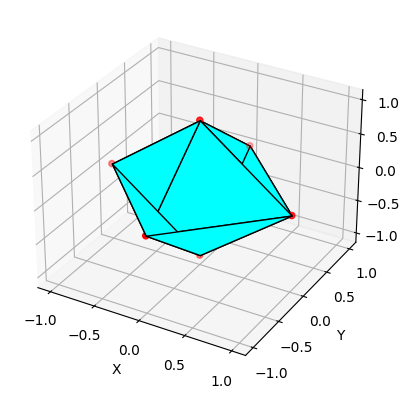

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np

# Coordonnées des points
points = np.array([
    [0.0, 1.0, 0.0],
    [1.0, 0.0, 0.0],
    [0.0, 0.0, 1.0],
    [-1.0, 0.0, 0.0],
    [0.0, 0.0, -1.0],
    [0.0, -1.0, 0.0]
])

# Liste des indices des points formant chaque triangle
triangles = np.array([
    [0, 1, 2],
    [0, 2, 3],
    [0, 3, 4],
    [0, 4, 1],
    [5, 1, 2],
    [5, 2, 3],
    [5, 3, 4],
    [5, 4, 1]
])

# Création de la figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Tracé des points
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c='r', marker='o')

# Tracé des surfaces triangulaires
for triangle in triangles:
    vertices = points[triangle]
    poly = Poly3DCollection([vertices])
    poly.set_edgecolor('k')
    poly.set_facecolor('cyan')
    ax.add_collection3d(poly)

# Configuration de l'axe des coordonnées
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Affichage de la figure
plt.show()


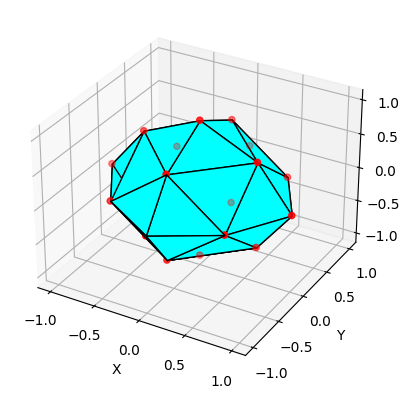

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Définition des points du cube
points = np.array([
    [0.0, 1.0, 0.0],
    [1.0, 0.0, 0.0],
    [0.0, 0.0, 1.0],
    [-1.0, 0.0, 0.0],
    [0.0, 0.0, -1.0],
    [0.0, -1.0, 0.0]
])


point_x =[0.0,1.0,0.0,-1.0,0.0,0.0]
point_y =[1.0,0.0,0.0,0.0,0.0,-1.0]
point_z =[0.0,0.0,1.0,0.0,-1.0,0.0]

# Liste des indices des points formant chaque triangle
triangles = np.array([
    [0, 1, 2],
    [0, 2, 3],
    [0, 3, 4],
    [0, 4, 1],
    [5, 1, 2],
    [5, 2, 3],
    [5, 3, 4],
    [5, 4, 1]
])


# Création de la nouvelle subdivision
new_triangles = np.array([])

w = 1/16

# Fonction qui récupère les triangles adjacents à deux points
def get_adjacent_triangles(triangles,pointA, pointB):
    liste_1_2 = [pointA,pointB]
    liste_1_8 = []
    liste_m_1_16 = []
    for tri in triangles:
        if pointA in tri and pointB in tri:
            for point in tri:
                if point != pointA and point != pointB:
                    liste_1_8.append(point)
    for tri in triangles:
        if not (pointA in tri and pointB in tri):
            for point in liste_1_8:
                if (point in tri and pointA in tri):
                    for pointtri in tri:
                        if pointtri != point and pointtri != pointA:
                            liste_m_1_16.append(pointtri)
                elif (point in tri and pointB in tri): 
                    for pointtri in tri:
                        if pointtri != point and pointtri != pointB:
                            liste_m_1_16.append(pointtri)
    
    return liste_1_2,liste_1_8,liste_m_1_16

# Fonction qui calcule le nouveau point sur une arrete de triangle
def create_point_from_edge(triangles,pointA,pointB):
    liste_1_2,liste_1_8,liste_m_1_16 = get_adjacent_triangles(triangles,pointA,pointB)
    # print(len(liste_1_2),len(liste_1_8),len(liste_m_1_16))
 
    xp = 1/2 * sum(np.take(point_x,liste_1_2)) + 2 * w * sum(np.take(point_x,liste_1_8)) - w * sum(np.take(point_x,liste_m_1_16))
    yp = 1/2 * sum(np.take(point_y,liste_1_2)) + 2 * w * sum(np.take(point_y,liste_1_8)) - w * sum(np.take(point_y,liste_m_1_16))
    zp = 1/2 * sum(np.take(point_z,liste_1_2)) + 2 * w * sum(np.take(point_z,liste_1_8)) - w * sum(np.take(point_z,liste_m_1_16))

    return xp,yp,zp


# Création des nouveaux triangles (subdivisés)
def butterfly_subdivision(triangles):
    new_triangles = []
    for tri in triangles:
        triangle1 = []
        triangle2 = []
        triangle3 = []
        triangle4 = []
        p1, p2, p3 = tri
        xp4,yp4,zp4 = create_point_from_edge(triangles,p1,p2)

        condition = np.multiply(np.multiply((xp4 == point_x),(yp4 == point_y)), (zp4 == point_z))
        p4 = np.where(condition)
        if (len(p4[0]) > 0):
            p4 = p4[0][0]
        else:
            #Ajout de point à la liste des coordonées
            point_x.append(xp4)
            point_y.append(yp4)
            point_z.append(zp4)

            p4= len(point_x)-1

        # Création des nouveaux triangles
        triangle1=[p1,p4]
        triangle2=[p2,p4]

        xp5,yp5,zp5 = create_point_from_edge(triangles,p2,p3)

        condition = np.multiply(np.multiply((xp5 == point_x),(yp5 == point_y)), (zp5 == point_z))
        p5 = np.where(condition)
        if (len(p5[0]) > 0):
            p5 = p5[0][0]
        else:
            #Ajout de point à la liste des coordonées
            point_x.append(xp5)
            point_y.append(yp5)
            point_z.append(zp5)
            p5 = len(point_x)-1

        triangle2.append(p5)
        triangle3=[p3,p5]

        xp6,yp6,zp6 = create_point_from_edge(triangles,p3,p1)

        condition = np.multiply(np.multiply((xp6 == point_x),(yp6 == point_y)), (zp6 == point_z))
        p6 = np.where(condition)
        if (len(p6[0]) > 0):
            p6 = p6[0][0]
        else:
            #Ajout de point à la liste des coordonées
            point_x.append(xp6)
            point_y.append(yp6)
            point_z.append(zp6)
            p6 = len(point_x)-1

        triangle1.append(p6)
        triangle3.append(p6)

        triangle4 =[p4,p5,p6]
        
        #Ajout des nouveaux triangles à la liste des triangles
        new_triangles.append(triangle1)
        new_triangles.append(triangle2)
        new_triangles.append(triangle3)
        new_triangles.append(triangle4)

    return new_triangles

# Fonction qui fait la subdivision Butterfly autant de fois que l'on veut
def butterfly_subdivision_loop(triangles,nb_subdivision):
    for i in range(nb_subdivision):
        triangles = butterfly_subdivision(triangles)
    return triangles        



# Plot des points et des triangles
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#On récupere les triangles subdivisés
new_triangles = butterfly_subdivision_loop(triangles,1)

# Plot des points
ax.scatter(point_x, point_y, point_z, c='r', marker='o')

# Plot des triangles
for tri in new_triangles:
    triplet = np.array([point_x[tri[0]],point_y[tri[0]],point_z[tri[0]]])
    triplet = np.vstack((triplet,[point_x[tri[1]],point_y[tri[1]],point_z[tri[1]]]))    
    triplet = np.vstack((triplet,[point_x[tri[2]],point_y[tri[2]],point_z[tri[2]]]))    

    poly = Poly3DCollection([triplet])
    poly.set_edgecolor('k')
    poly.set_facecolor('cyan')
    ax.add_collection3d(poly)

# Configuration des axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Affichage du plot
plt.show()


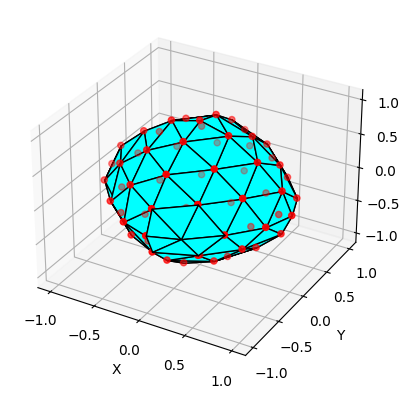

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Définition des points du cube
points = np.array([
    [0.0, 1.0, 0.0],
    [1.0, 0.0, 0.0],
    [0.0, 0.0, 1.0],
    [-1.0, 0.0, 0.0],
    [0.0, 0.0, -1.0],
    [0.0, -1.0, 0.0]
])


point_x =[0.0,1.0,0.0,-1.0,0.0,0.0]
point_y =[1.0,0.0,0.0,0.0,0.0,-1.0]
point_z =[0.0,0.0,1.0,0.0,-1.0,0.0]

# Liste des indices des points formant chaque triangle
triangles = np.array([
    [0, 1, 2],
    [0, 2, 3],
    [0, 3, 4],
    [0, 4, 1],
    [5, 1, 2],
    [5, 2, 3],
    [5, 3, 4],
    [5, 4, 1]
])


# Création de la nouvelle subdivision
new_triangles = np.array([])

w = 1/16

# Fonction qui récupère les triangles adjacents à deux points
def get_adjacent_triangles(triangles,pointA, pointB):
    liste_1_2 = [pointA,pointB]
    liste_1_8 = []
    liste_m_1_16 = []
    for tri in triangles:
        if pointA in tri and pointB in tri:
            for point in tri:
                if point != pointA and point != pointB:
                    liste_1_8.append(point)
    for tri in triangles:
        if not (pointA in tri and pointB in tri):
            for point in liste_1_8:
                if (point in tri and pointA in tri):
                    for pointtri in tri:
                        if pointtri != point and pointtri != pointA:
                            liste_m_1_16.append(pointtri)
                elif (point in tri and pointB in tri): 
                    for pointtri in tri:
                        if pointtri != point and pointtri != pointB:
                            liste_m_1_16.append(pointtri)
    
    return liste_1_2,liste_1_8,liste_m_1_16

# Fonction qui calcule le nouveau point sur une arrete de triangle
def create_point_from_edge(triangles,pointA,pointB):
    liste_1_2,liste_1_8,liste_m_1_16 = get_adjacent_triangles(triangles,pointA,pointB)
    # print(len(liste_1_2),len(liste_1_8),len(liste_m_1_16))
 
    xp = 1/2 * sum(np.take(point_x,liste_1_2)) + 2 * w * sum(np.take(point_x,liste_1_8)) - w * sum(np.take(point_x,liste_m_1_16))
    yp = 1/2 * sum(np.take(point_y,liste_1_2)) + 2 * w * sum(np.take(point_y,liste_1_8)) - w * sum(np.take(point_y,liste_m_1_16))
    zp = 1/2 * sum(np.take(point_z,liste_1_2)) + 2 * w * sum(np.take(point_z,liste_1_8)) - w * sum(np.take(point_z,liste_m_1_16))

    return xp,yp,zp


# Création des nouveaux triangles (subdivisés)
def butterfly_subdivision(triangles):
    new_triangles = []
    for tri in triangles:
        triangle1 = []
        triangle2 = []
        triangle3 = []
        triangle4 = []
        p1, p2, p3 = tri
        xp4,yp4,zp4 = create_point_from_edge(triangles,p1,p2)

        condition = np.multiply(np.multiply((xp4 == point_x),(yp4 == point_y)), (zp4 == point_z))
        p4 = np.where(condition)
        if (len(p4[0]) > 0):
            p4 = p4[0][0]
        else:
            #Ajout de point à la liste des coordonées
            point_x.append(xp4)
            point_y.append(yp4)
            point_z.append(zp4)

            p4= len(point_x)-1

        # Création des nouveaux triangles
        triangle1=[p1,p4]
        triangle2=[p2,p4]

        xp5,yp5,zp5 = create_point_from_edge(triangles,p2,p3)

        condition = np.multiply(np.multiply((xp5 == point_x),(yp5 == point_y)), (zp5 == point_z))
        p5 = np.where(condition)
        if (len(p5[0]) > 0):
            p5 = p5[0][0]
        else:
            #Ajout de point à la liste des coordonées
            point_x.append(xp5)
            point_y.append(yp5)
            point_z.append(zp5)
            p5 = len(point_x)-1

        triangle2.append(p5)
        triangle3=[p3,p5]

        xp6,yp6,zp6 = create_point_from_edge(triangles,p3,p1)

        condition = np.multiply(np.multiply((xp6 == point_x),(yp6 == point_y)), (zp6 == point_z))
        p6 = np.where(condition)
        if (len(p6[0]) > 0):
            p6 = p6[0][0]
        else:
            #Ajout de point à la liste des coordonées
            point_x.append(xp6)
            point_y.append(yp6)
            point_z.append(zp6)
            p6 = len(point_x)-1

        triangle1.append(p6)
        triangle3.append(p6)

        triangle4 =[p4,p5,p6]
        
        #Ajout des nouveaux triangles à la liste des triangles
        new_triangles.append(triangle1)
        new_triangles.append(triangle2)
        new_triangles.append(triangle3)
        new_triangles.append(triangle4)

    return new_triangles

# Fonction qui fait la subdivision Butterfly autant de fois que l'on veut
def butterfly_subdivision_loop(triangles,nb_subdivision):
    for i in range(nb_subdivision):
        triangles = butterfly_subdivision(triangles)
    return triangles        



# Plot des points et des triangles
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#On récupere les triangles subdivisés
new_triangles = butterfly_subdivision_loop(triangles,2)

# Plot des points
ax.scatter(point_x, point_y, point_z, c='r', marker='o')

# Plot des triangles
for tri in new_triangles:
    triplet = np.array([point_x[tri[0]],point_y[tri[0]],point_z[tri[0]]])
    triplet = np.vstack((triplet,[point_x[tri[1]],point_y[tri[1]],point_z[tri[1]]]))    
    triplet = np.vstack((triplet,[point_x[tri[2]],point_y[tri[2]],point_z[tri[2]]]))    

    poly = Poly3DCollection([triplet])
    poly.set_edgecolor('k')
    poly.set_facecolor('cyan')
    ax.add_collection3d(poly)

# Configuration des axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Affichage du plot
plt.show()


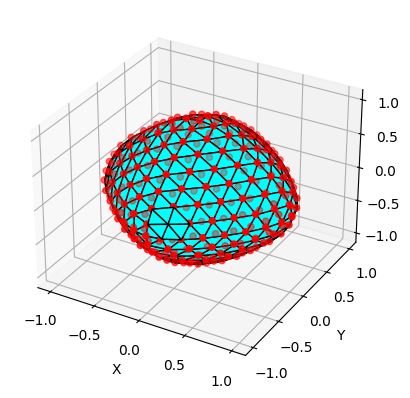

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Définition des points du cube
points = np.array([
    [0.0, 1.0, 0.0],
    [1.0, 0.0, 0.0],
    [0.0, 0.0, 1.0],
    [-1.0, 0.0, 0.0],
    [0.0, 0.0, -1.0],
    [0.0, -1.0, 0.0]
])


point_x =[0.0,1.0,0.0,-1.0,0.0,0.0]
point_y =[1.0,0.0,0.0,0.0,0.0,-1.0]
point_z =[0.0,0.0,1.0,0.0,-1.0,0.0]

# Liste des indices des points formant chaque triangle
triangles = np.array([
    [0, 1, 2],
    [0, 2, 3],
    [0, 3, 4],
    [0, 4, 1],
    [5, 1, 2],
    [5, 2, 3],
    [5, 3, 4],
    [5, 4, 1]
])


# Création de la nouvelle subdivision
new_triangles = np.array([])

w = 1/16

# Fonction qui récupère les triangles adjacents à deux points
def get_adjacent_triangles(triangles,pointA, pointB):
    liste_1_2 = [pointA,pointB]
    liste_1_8 = []
    liste_m_1_16 = []
    for tri in triangles:
        if pointA in tri and pointB in tri:
            for point in tri:
                if point != pointA and point != pointB:
                    liste_1_8.append(point)
    for tri in triangles:
        if not (pointA in tri and pointB in tri):
            for point in liste_1_8:
                if (point in tri and pointA in tri):
                    for pointtri in tri:
                        if pointtri != point and pointtri != pointA:
                            liste_m_1_16.append(pointtri)
                elif (point in tri and pointB in tri): 
                    for pointtri in tri:
                        if pointtri != point and pointtri != pointB:
                            liste_m_1_16.append(pointtri)
    
    return liste_1_2,liste_1_8,liste_m_1_16

# Fonction qui calcule le nouveau point sur une arrete de triangle
def create_point_from_edge(triangles,pointA,pointB):
    liste_1_2,liste_1_8,liste_m_1_16 = get_adjacent_triangles(triangles,pointA,pointB)
    # print(len(liste_1_2),len(liste_1_8),len(liste_m_1_16))
 
    xp = 1/2 * sum(np.take(point_x,liste_1_2)) + 2 * w * sum(np.take(point_x,liste_1_8)) - w * sum(np.take(point_x,liste_m_1_16))
    yp = 1/2 * sum(np.take(point_y,liste_1_2)) + 2 * w * sum(np.take(point_y,liste_1_8)) - w * sum(np.take(point_y,liste_m_1_16))
    zp = 1/2 * sum(np.take(point_z,liste_1_2)) + 2 * w * sum(np.take(point_z,liste_1_8)) - w * sum(np.take(point_z,liste_m_1_16))

    return xp,yp,zp


# Création des nouveaux triangles (subdivisés)
def butterfly_subdivision(triangles):
    new_triangles = []
    for tri in triangles:
        triangle1 = []
        triangle2 = []
        triangle3 = []
        triangle4 = []
        p1, p2, p3 = tri
        xp4,yp4,zp4 = create_point_from_edge(triangles,p1,p2)

        condition = np.multiply(np.multiply((xp4 == point_x),(yp4 == point_y)), (zp4 == point_z))
        p4 = np.where(condition)
        if (len(p4[0]) > 0):
            p4 = p4[0][0]
        else:
            #Ajout de point à la liste des coordonées
            point_x.append(xp4)
            point_y.append(yp4)
            point_z.append(zp4)

            p4= len(point_x)-1

        # Création des nouveaux triangles
        triangle1=[p1,p4]
        triangle2=[p2,p4]

        xp5,yp5,zp5 = create_point_from_edge(triangles,p2,p3)

        condition = np.multiply(np.multiply((xp5 == point_x),(yp5 == point_y)), (zp5 == point_z))
        p5 = np.where(condition)
        if (len(p5[0]) > 0):
            p5 = p5[0][0]
        else:
            #Ajout de point à la liste des coordonées
            point_x.append(xp5)
            point_y.append(yp5)
            point_z.append(zp5)
            p5 = len(point_x)-1

        triangle2.append(p5)
        triangle3=[p3,p5]

        xp6,yp6,zp6 = create_point_from_edge(triangles,p3,p1)

        condition = np.multiply(np.multiply((xp6 == point_x),(yp6 == point_y)), (zp6 == point_z))
        p6 = np.where(condition)
        if (len(p6[0]) > 0):
            p6 = p6[0][0]
        else:
            #Ajout de point à la liste des coordonées
            point_x.append(xp6)
            point_y.append(yp6)
            point_z.append(zp6)
            p6 = len(point_x)-1

        triangle1.append(p6)
        triangle3.append(p6)

        triangle4 =[p4,p5,p6]
        
        #Ajout des nouveaux triangles à la liste des triangles
        new_triangles.append(triangle1)
        new_triangles.append(triangle2)
        new_triangles.append(triangle3)
        new_triangles.append(triangle4)

    return new_triangles

# Fonction qui fait la subdivision Butterfly autant de fois que l'on veut
def butterfly_subdivision_loop(triangles,nb_subdivision):
    for i in range(nb_subdivision):
        triangles = butterfly_subdivision(triangles)
    return triangles        



# Plot des points et des triangles
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#On récupere les triangles subdivisés
new_triangles = butterfly_subdivision_loop(triangles,3)

# Plot des points
ax.scatter(point_x, point_y, point_z, c='r', marker='o')

# Plot des triangles
for tri in new_triangles:
    triplet = np.array([point_x[tri[0]],point_y[tri[0]],point_z[tri[0]]])
    triplet = np.vstack((triplet,[point_x[tri[1]],point_y[tri[1]],point_z[tri[1]]]))    
    triplet = np.vstack((triplet,[point_x[tri[2]],point_y[tri[2]],point_z[tri[2]]]))    

    poly = Poly3DCollection([triplet])
    poly.set_edgecolor('k')
    poly.set_facecolor('cyan')
    ax.add_collection3d(poly)

# Configuration des axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Affichage du plot
plt.show()


## **FIGURE 3 : Tétraèdre régulier**

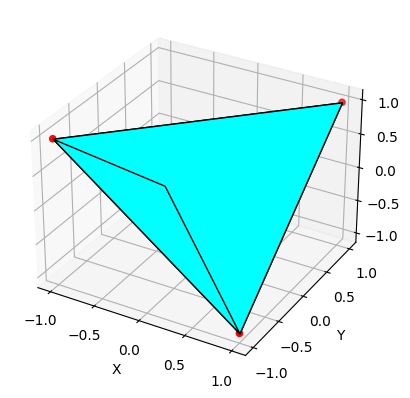

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np

# Coordonnées des points
points = np.array([
    [1, 1, 1],
    [-1, -1, 1],
    [-1, 1, -1],
    [1, -1, -1]
])

# Liste des indices des points formant chaque face
triangles = np.array([
    [0, 1, 2],
    [0, 2, 3],
    [0, 3, 1],
    [1, 3, 2]
])

# Création de la figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Tracé des points
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c='r', marker='o')

# Tracé des surfaces triangulaires
for triangle in triangles:
    vertices = points[triangle]
    poly = Poly3DCollection([vertices])
    poly.set_edgecolor('k')
    poly.set_facecolor('cyan')
    ax.add_collection3d(poly)

# Configuration de l'axe des coordonnées
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Affichage de la figure
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Coordonnées des points
points = np.array([
    [1, 1, 1],
    [-1, -1, 1],
    [-1, 1, -1],
    [1, -1, -1]
])

point_x =[1.0, -1.0, -1.0, 1.0]
point_y =[1.0, -1.0, 1.0, -1.0]
point_z =[1.0, 1.0, -1.0, -1.0]

# Liste des indices des points formant chaque face
triangles = np.array([
    [0, 1, 2],
    [0, 2, 3],
    [0, 3, 1],
    [1, 3, 2]
])


# Création de la nouvelle subdivision
new_triangles = np.array([])

w = 1/16

# Fonction qui récupère les triangles adjacents à deux points
def get_adjacent_triangles(triangles,pointA, pointB):
    liste_1_2 = [pointA,pointB]
    liste_1_8 = []
    liste_m_1_16 = []
    for tri in triangles:
        if pointA in tri and pointB in tri:
            for point in tri:
                if point != pointA and point != pointB:
                    liste_1_8.append(point)
    for tri in triangles:
        if not (pointA in tri and pointB in tri):
            for point in liste_1_8:
                if (point in tri and pointA in tri):
                    for pointtri in tri:
                        if pointtri != point and pointtri != pointA:
                            liste_m_1_16.append(pointtri)
                elif (point in tri and pointB in tri): 
                    for pointtri in tri:
                        if pointtri != point and pointtri != pointB:
                            liste_m_1_16.append(pointtri)
    
    return liste_1_2,liste_1_8,liste_m_1_16

# Fonction qui calcule le nouveau point sur une arrete de triangle
def create_point_from_edge(triangles,pointA,pointB):
    liste_1_2,liste_1_8,liste_m_1_16 = get_adjacent_triangles(triangles,pointA,pointB)
    # print(len(liste_1_2),len(liste_1_8),len(liste_m_1_16))
 
    xp = 1/2 * sum(np.take(point_x,liste_1_2)) + 2 * w * sum(np.take(point_x,liste_1_8)) - w * sum(np.take(point_x,liste_m_1_16))
    yp = 1/2 * sum(np.take(point_y,liste_1_2)) + 2 * w * sum(np.take(point_y,liste_1_8)) - w * sum(np.take(point_y,liste_m_1_16))
    zp = 1/2 * sum(np.take(point_z,liste_1_2)) + 2 * w * sum(np.take(point_z,liste_1_8)) - w * sum(np.take(point_z,liste_m_1_16))

    return xp,yp,zp


# Création des nouveaux triangles (subdivisés)
def butterfly_subdivision(triangles):
    new_triangles = []
    for tri in triangles:
        triangle1 = []
        triangle2 = []
        triangle3 = []
        triangle4 = []
        p1, p2, p3 = tri
        xp4,yp4,zp4 = create_point_from_edge(triangles,p1,p2)

        condition = np.multiply(np.multiply((xp4 == point_x),(yp4 == point_y)), (zp4 == point_z))
        p4 = np.where(condition)
        if (len(p4[0]) > 0):
            p4 = p4[0][0]
        else:
            #Ajout de point à la liste des coordonées
            point_x.append(xp4)
            point_y.append(yp4)
            point_z.append(zp4)

            p4= len(point_x)-1

        # Création des nouveaux triangles
        triangle1=[p1,p4]
        triangle2=[p2,p4]

        xp5,yp5,zp5 = create_point_from_edge(triangles,p2,p3)

        condition = np.multiply(np.multiply((xp5 == point_x),(yp5 == point_y)), (zp5 == point_z))
        p5 = np.where(condition)
        if (len(p5[0]) > 0):
            p5 = p5[0][0]
        else:
            #Ajout de point à la liste des coordonées
            point_x.append(xp5)
            point_y.append(yp5)
            point_z.append(zp5)
            p5 = len(point_x)-1

        triangle2.append(p5)
        triangle3=[p3,p5]

        xp6,yp6,zp6 = create_point_from_edge(triangles,p3,p1)

        condition = np.multiply(np.multiply((xp6 == point_x),(yp6 == point_y)), (zp6 == point_z))
        p6 = np.where(condition)
        if (len(p6[0]) > 0):
            p6 = p6[0][0]
        else:
            #Ajout de point à la liste des coordonées
            point_x.append(xp6)
            point_y.append(yp6)
            point_z.append(zp6)
            p6 = len(point_x)-1

        triangle1.append(p6)
        triangle3.append(p6)

        triangle4 =[p4,p5,p6]
        
        #Ajout des nouveaux triangles à la liste des triangles
        new_triangles.append(triangle1)
        new_triangles.append(triangle2)
        new_triangles.append(triangle3)
        new_triangles.append(triangle4)

    return new_triangles

# Fonction qui fait la subdivision Butterfly autant de fois que l'on veut
def butterfly_subdivision_loop(triangles,nb_subdivision):
    for i in range(nb_subdivision):
        triangles = butterfly_subdivision(triangles)
    return triangles        



# Plot des points et des triangles
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#On récupere les triangles subdivisés
new_triangles = butterfly_subdivision_loop(triangles,3)

# Plot des points
ax.scatter(point_x, point_y, point_z, c='r', marker='o')

# Plot des triangles
for tri in new_triangles:
    triplet = np.array([point_x[tri[0]],point_y[tri[0]],point_z[tri[0]]])
    triplet = np.vstack((triplet,[point_x[tri[1]],point_y[tri[1]],point_z[tri[1]]]))    
    triplet = np.vstack((triplet,[point_x[tri[2]],point_y[tri[2]],point_z[tri[2]]]))    

    poly = Poly3DCollection([triplet])
    poly.set_edgecolor('k')
    poly.set_facecolor('cyan')
    ax.add_collection3d(poly)

# Configuration des axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Affichage du plot
plt.show()
